# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus
0. Inspect data
0. Clean and Process Text
0. Vectorize your text
0. Classify your text using Multinomial Naive Bayes
0. Classify your text using Random Forest. 
0. Eval your models.  
0. Classify a NEW PIECE of text. Any string you want to feed it. 


## PART 2:
- Republican vs Democrat Tweet Classifier
0.  This is self guided, can you get a f1 above 82%?  -its not easy.

In [98]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Import our metrics to evaluate our model
from sklearn import metrics


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')


stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/naa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/naa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/naa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/naa/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /home/naa/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [46]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/20-newsgroups.csv')
print(df.shape)
df.head()

(11314, 4)


,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [47]:
# 3. Inspect / remove nulls and duplicates
print(df.iloc[0]['message'])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [48]:
print(df.isnull().sum())
print('Duplicated:', df.duplicated().sum())

id                0
message           0
topic             0
topic_category    0
dtype: int64
Duplicated: 0


In [49]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
0. EXTRA CREDIT:  
    0. Make a function that stemms all words. 
    0. Make a function that removes all stopwords.

5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [50]:
# 1. Make a function that makes all text lowercase.
def to_lowercase(str):
    return str.lower()
    
test_string = 'This is A SENTENCE with LOTS OF CAPS.'
print(to_lowercase(test_string))

this is a sentence with lots of caps.


In [51]:
# 2. Make a function that removes all punctuation. 
def remove_punctuation(str):
    str = re.sub(r'[^\w\s]', '', str)
    return str
    
test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
print(remove_punctuation(test_string))

This is a sentence 50 With lots of punctuation  other things


In [52]:
# 3. Make a function that removes all stopwords.
def remove_stopwords(str):
    words = word_tokenize(str)
    valid_words = []
    for word in words:
        if word not in stopwords:
            valid_words.append(word)
    str = ' '.join(valid_words)
    return str
    
test_string = 'This is a sentence! With some different stopwords i have added in here.'
print(remove_stopwords(test_string))

This sentence ! With different stopwords added .


In [53]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

test_string = 'I played and started playing with players and we all love to play with plays'



In [54]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.
def convert_pos(pos):
    if pos.startswith('V'):
        return wordnet.VERB
    elif pos.startswith('J'):
        return wordnet.ADJ
    elif pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lem_with_pos_tag(str):
    words = word_tokenize(str)
    words = [word for word in words if word not in stopwords]
    tagged_words = nltk.pos_tag(words)
    valid_words = []
    lemmatizer = WordNetLemmatizer()
    for word in tagged_words:
        the_word = word[0]
        the_pos_tag = word[1]
        the_pos_tag = convert_pos(the_pos_tag)
        lemmed_word = lemmatizer.lemmatize(the_word, the_pos_tag)
        valid_words.append(lemmed_word)
    str = ' '.join(valid_words)
    return str

def text_pipeline(str):
    str = to_lowercase(str)
    str = remove_punctuation(str)
    # str = lem_with_pos_tag(str)
    return str

test_string = 'I played and started playing with players and we all love to play with plays'
print(text_pipeline(test_string))

i played and started playing with players and we all love to play with plays


In [55]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message_clean'] = df['message'].apply(text_pipeline)
print(df['message_clean'][0])

from lerxstwamumdedu wheres my thing
subject what car is this
nntppostinghost rac3wamumdedu
organization university of maryland college park
lines 15

 i was wondering if anyone out there could enlighten me on this car i saw
the other day it was a 2door sports car looked to be from the late 60s
early 70s it was called a bricklin the doors were really small in addition
the front bumper was separate from the rest of the body this is 
all i know if anyone can tellme a model name engine specs years
of production where this car is made history or whatever info you
have on this funky looking car please email

thanks
 il
    brought to you by your neighborhood lerxst 







# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [56]:
# 0. Define your `X` and `y` data. 
X = df['message_clean']
y = df['topic_category']


In [57]:
# 1. Train test split your data.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

X_train_text = X_train
X_test_text = X_test


In [58]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).

vectorizer = TfidfVectorizer()

In [59]:
# 3. Fit your vectorizer using your X data

vectorizer.fit(X_train)

TfidfVectorizer()

In [60]:
# 4. Transform your X data using your fitted vectorizer. 
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)


In [61]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?
print(X_train.shape, type(X_train))


(9051, 122023) <class 'scipy.sparse._csr.csr_matrix'>


___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [62]:
# 1. Initalize an empty model. 
model = MultinomialNB(alpha=.0001)



In [63]:
# Fit our model with our training data.
model.fit(X_train, y_train)


MultinomialNB(alpha=0.0001)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [64]:
# 1. Make new predictions of our testing data. 
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)



In [65]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.906319


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'alt.atheism'),
  Text(1, 0, 'comp.graphics'),
  Text(2, 0, 'comp.os.ms-windows.misc'),
  Text(3, 0, 'comp.sys.ibm.pc.hardware'),
  Text(4, 0, 'comp.sys.mac.hardware'),
  Text(5, 0, 'comp.windows.x'),
  Text(6, 0, 'misc.forsale'),
  Text(7, 0, 'rec.autos'),
  Text(8, 0, 'rec.motorcycles'),
  Text(9, 0, 'rec.sport.baseball'),
  Text(10, 0, 'rec.sport.hockey'),
  Text(11, 0, 'sci.crypt'),
  Text(12, 0, 'sci.electronics'),
  Text(13, 0, 'sci.med'),
  Text(14, 0, 'sci.space'),
  Text(15, 0, 'soc.religion.christian'),
  Text(16, 0, 'talk.politics.guns'),
  Text(17, 0, 'talk.politics.mideast'),
  Text(18, 0, 'talk.politics.misc'),
  Text(19, 0, 'talk.religion.misc')])

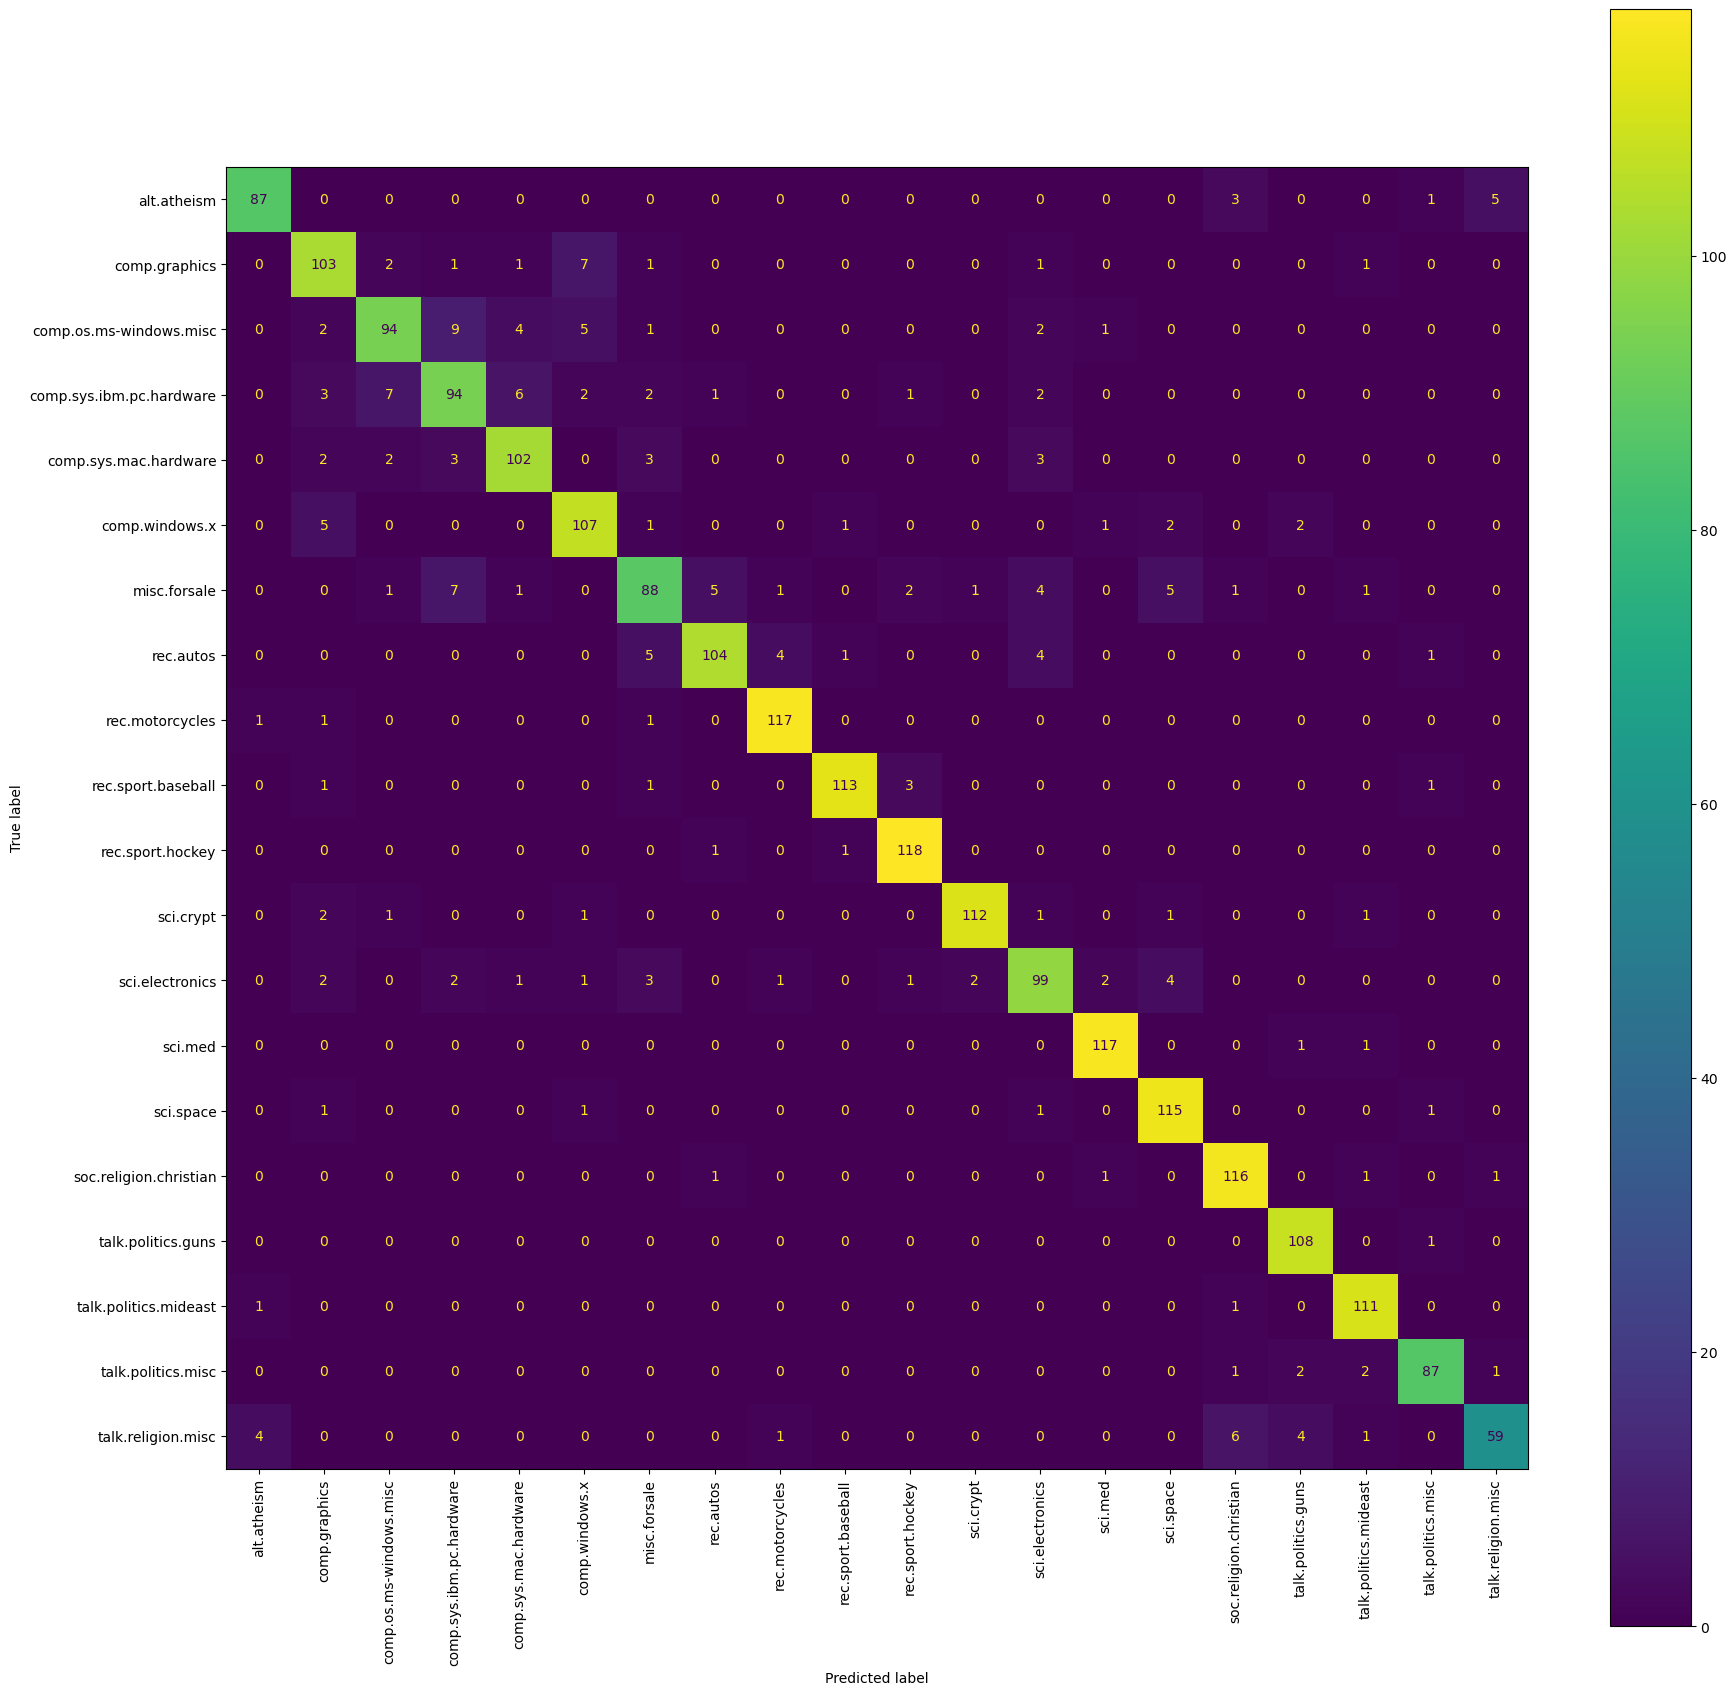

In [66]:
# 3. Plot the confusion matrix of our predictions
# you can use Sklearns `ConfusionMatrixDisplay`
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax)
plt.xticks(rotation=90)

In [67]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
print(classification_report(y_test, y_pred, target_names=model.classes_))


                          precision    recall  f1-score   support

             alt.atheism       0.94      0.91      0.92        96
           comp.graphics       0.84      0.88      0.86       117
 comp.os.ms-windows.misc       0.88      0.80      0.84       118
comp.sys.ibm.pc.hardware       0.81      0.80      0.80       118
   comp.sys.mac.hardware       0.89      0.89      0.89       115
          comp.windows.x       0.86      0.90      0.88       119
            misc.forsale       0.83      0.75      0.79       117
               rec.autos       0.93      0.87      0.90       119
         rec.motorcycles       0.94      0.97      0.96       120
      rec.sport.baseball       0.97      0.95      0.96       119
        rec.sport.hockey       0.94      0.98      0.96       120
               sci.crypt       0.97      0.94      0.96       119
         sci.electronics       0.85      0.84      0.84       118
                 sci.med       0.96      0.98      0.97       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [69]:
my_sentence = 'I support responsible gun ownership and defend the Second Amendment.'

# 1. Apply the text pipeline to your sentence
my_sentence = text_pipeline(my_sentence)
print(my_sentence)
# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
X = vectorizer.transform([my_sentence])
# 3. Use the model to predict your new `X`. 
predication = model.predict(X)
# 4. Print the prediction
print(predication)

i support responsible gun ownership and defend the second amendment
['talk.politics.guns']


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [120]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')
print(df.shape)
df.head()

(86460, 3)


,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [121]:
print(df.iloc[0]['Tweet'])

Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L


In [122]:
print(df.isnull().sum())

Party     0
Handle    0
Tweet     0
dtype: int64


In [123]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 57


In [124]:
df = df.drop_duplicates()

In [125]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [126]:
df.Party.value_counts()

Republican    44362
Democrat      42041
Name: Party, dtype: int64

In [127]:
df['Tweet_clean'] = df['Tweet'].apply(text_pipeline)
print(df['Tweet_clean'][0])

today senate dems vote to savetheinternet proud to support similar netneutrality legislation here in the house httpstcon3tggdlu1l


In [128]:
X = df['Tweet']
y = df['Party']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

X_train_text = X_train
X_test_text = X_test
print(df.shape, len(X_train_text))

(86403, 4) 69122


In [130]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [131]:
print(X_train.shape, type(X_train))

(69122, 106734) <class 'scipy.sparse._csr.csr_matrix'>


In [132]:
model = MultinomialNB(alpha=.0001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
accuracy = model.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.804409


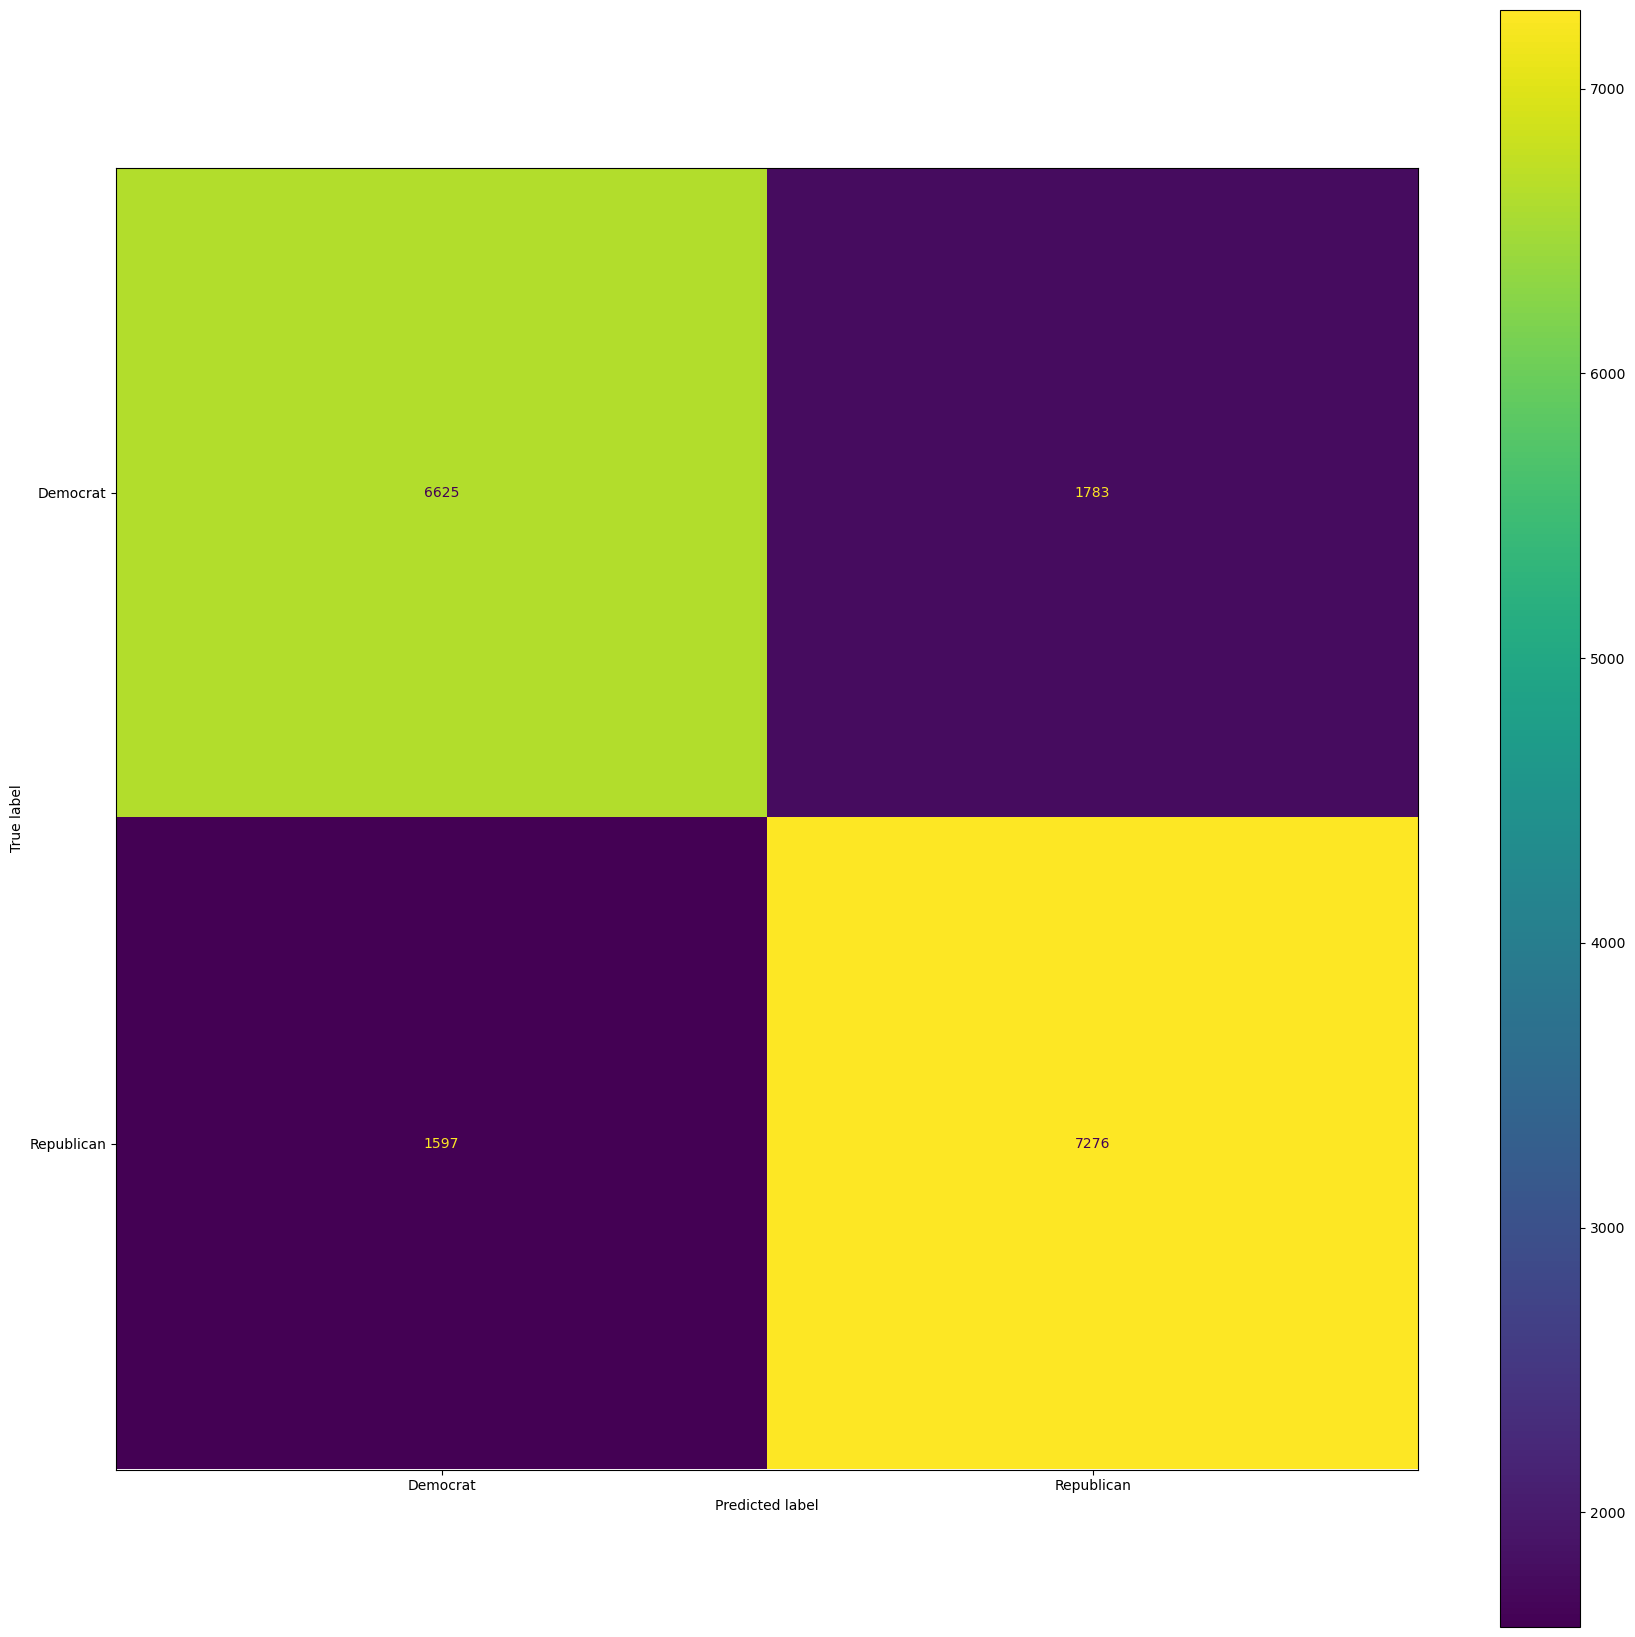

In [133]:
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);

In [134]:
print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

    Democrat       0.81      0.79      0.80      8408
  Republican       0.80      0.82      0.81      8873

    accuracy                           0.80     17281
   macro avg       0.80      0.80      0.80     17281
weighted avg       0.80      0.80      0.80     17281



In [136]:
def make_predication(str):
    str = text_pipeline(str)
    str_vectorized = vectorizer.transform([str])
    predication = model.predict(str_vectorized)
    pp = model.predict_proba(str_vectorized)
    print('Probability:', list(zip(model.classes_, pp.round(3)[0])))
    print('Predication:', predication, '\n')
    
my_sentence1 = 'New York is a Democrat state'
my_sentence2 = 'Texas is a Republican state'
my_sentence3 = 'Florida is not a Democrat or Republican state'

make_predication(my_sentence1)
make_predication(my_sentence2)
make_predication(my_sentence3)

Probability: [('Democrat', 0.467), ('Republican', 0.533)]
Predication: ['Republican'] 

Probability: [('Democrat', 0.491), ('Republican', 0.509)]
Predication: ['Republican'] 

Probability: [('Democrat', 0.672), ('Republican', 0.328)]
Predication: ['Democrat'] 



In [135]:
# random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model = RandomForestClassifier(100)

random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
y_pred_proba = random_forest_model.predict_proba(X_test)
accuracy = random_forest_model.score(X_test, y_test)
print('Model Accuracy: %f' % accuracy)
print(classification_report(y_test, y_pred, target_names=random_forest_model.classes_))

Model Accuracy: 0.724148
              precision    recall  f1-score   support

    Democrat       0.77      0.62      0.69      8408
  Republican       0.70      0.82      0.75      8873

    accuracy                           0.72     17281
   macro avg       0.73      0.72      0.72     17281
weighted avg       0.73      0.72      0.72     17281

